 ##                  **Capstone Project - "Healthcare_Prediction of Diabetes"**

In [1]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#input the dataset
data = pd.read_csv("health care diabetes.csv")
dataframe = data

In [3]:
#Let us check the first 5 rows of the dataframe
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#let us find the number of rows and columns
data.shape

(768, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
d1 = data.duplicated(keep='first')  #check for duplicate data. if yes, retain the first one.
d1                                #There are no duplicate values as all the 768 rows are present.

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [7]:
#check for missing values
d2 = data.isnull().sum()
d2                     #There are no missing values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
data.describe()   #statistical analysis

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


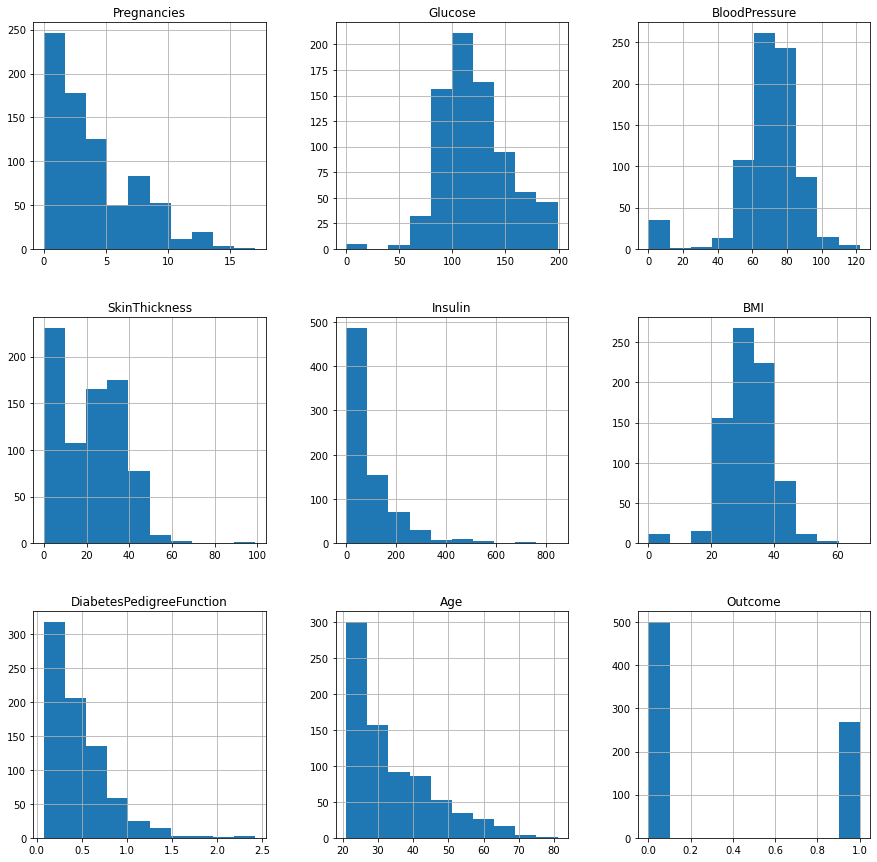

In [9]:
#let us visualize the data
data.hist(figsize = (15,15));

<div class="alert alert-info">
From the above histograms, we can see that the columns, "Pregnancies", "Insulin", "Age", "Diabetes Pedigree Function", are right skewed. Also, in the columns, "Glucose", "Blood Pressure", "Skin Thickness", "Blood Pressure", "Insulin" and "BMI" have "0" values which is not possible.

## Exploratory data analysis:

<div class="alert alert-danger">
Let us select the columns with "0" values and replace them with the mean values of the respective columns

In [10]:
df = dataframe.iloc[:,1:-3]            #Save the five columns in 'df' dataframe
df = df.mask(df == 0).fillna(df.mean())  #after masking the rows with 0's take the mean of rest of the 
                                     #rows and replace the 0's.

In [11]:
df.head()   # display the first five rows of the cleaned data

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.0,72.0,35.000000,79.799479,33.6
1,85.0,66.0,29.000000,79.799479,26.6
2,183.0,64.0,20.536458,79.799479,23.3
3,89.0,66.0,23.000000,94.000000,28.1
4,137.0,40.0,35.000000,168.000000,43.1


In [12]:
df1 = dataframe.iloc[:,0]   #Save the "Pregnancies" in df1
df2 = dataframe.iloc[:,-3:] # Save the rest of the 3 columns in df2
df1 = df1.to_frame()
print(df1.head())
df2.head()

   Pregnancies
0            6
1            1
2            8
3            1
4            0


,DiabetesPedigreeFunction,Age,Outcome
0,0.627,50,1
1,0.351,31,0
2,0.672,32,1
3,0.167,21,0
4,2.288,33,1


In [13]:
new_data = pd.concat([df1, df, df2], axis = 1) #combine df1, df and df2 into a single dataframe
new_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [14]:
x = new_data.dtypes
print(x)

Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [15]:
import seaborn as sns   #import the seaborn library for visualization

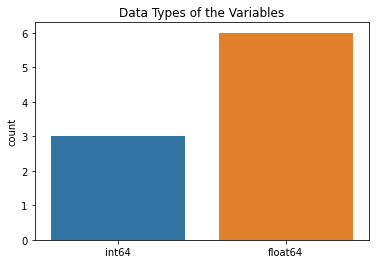

In [16]:
#display the countplot to find the data types
sns.countplot(x = x, data = new_data)
plt.title("Data Types of the Variables")
plt.show()

<div class="alert alert-danger">
3 variables are of integer type and the rest 6 variables are of float type

C:\Users\meetu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


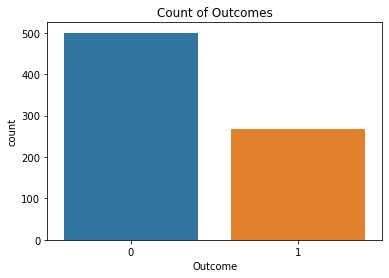

In [17]:
#Plot the count of Diabetic and Non-diabetic population. '0' means Non-diabetic. '1' means Diabetic.
sns.countplot(new_data.Outcome)
plt.title("Count of Outcomes");

<div class="alert alert-info">
From the above countplot we can see that of the 768 patients, 500 patients do not have diabetes and the rest of 268 have diabetes

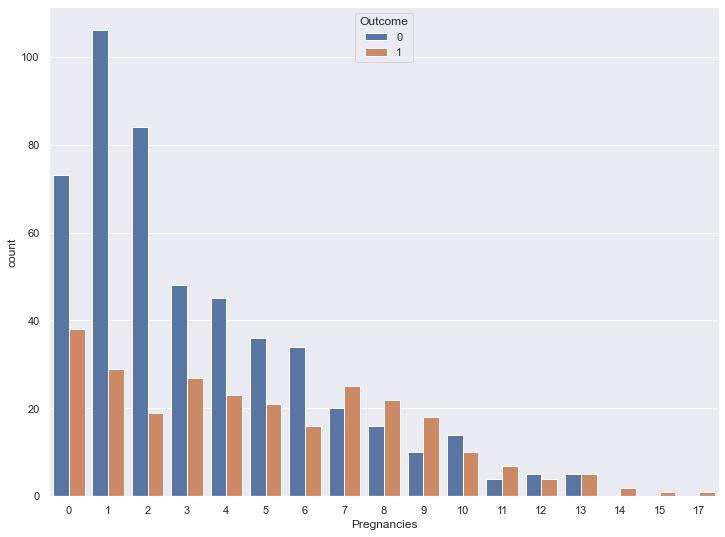

In [18]:
sns.set(rc = {'figure.figsize': (12,9)})
sns.countplot(x = 'Pregnancies', data = new_data, hue = 'Outcome');

<div class="alert alert-success">
The countplot of Pregnancies shows that it is right skewed. Patients who have had pregnancies between 7 and 9 are prone to Diabetes. 

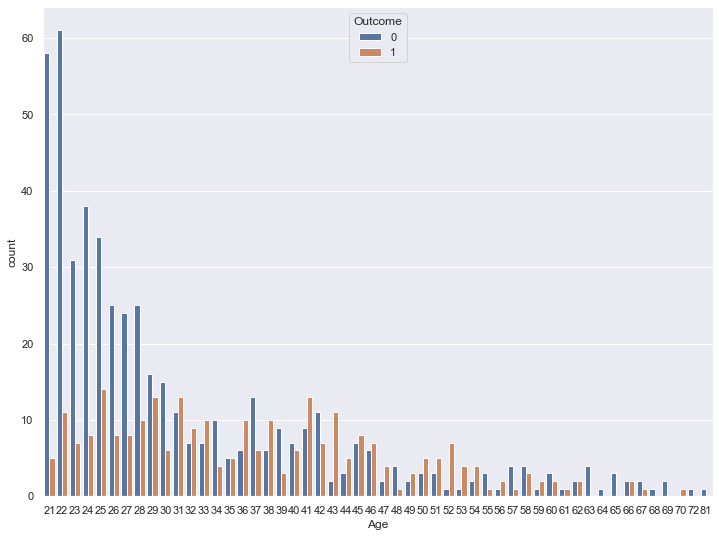

In [19]:
sns.countplot(x = 'Age', data = new_data, hue = 'Outcome');

<div class="alert alert-info">
The count plot of age shows that above the age of 30 years and below 56 years, people are prone to get diabetes.

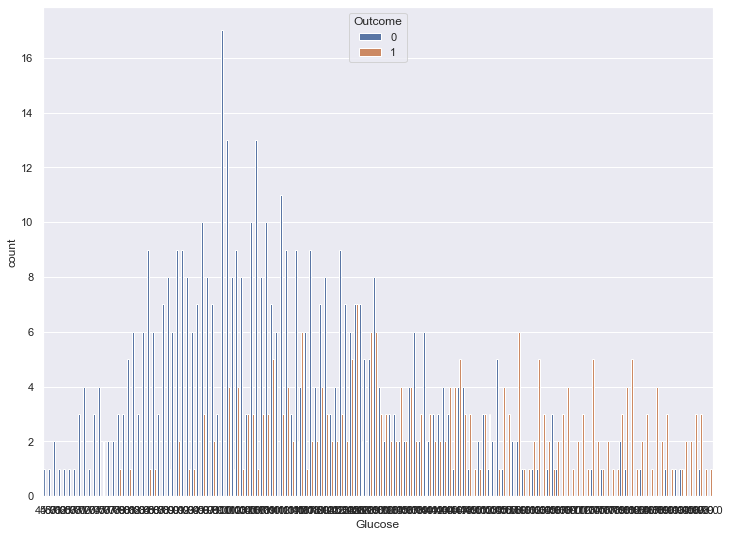

In [20]:
sns.countplot(x = 'Glucose', data = new_data, hue = 'Outcome');

<div class="alert alert-danger">
From the above countplot, we can see that a high level of glucose is an indicative of Diabetes.

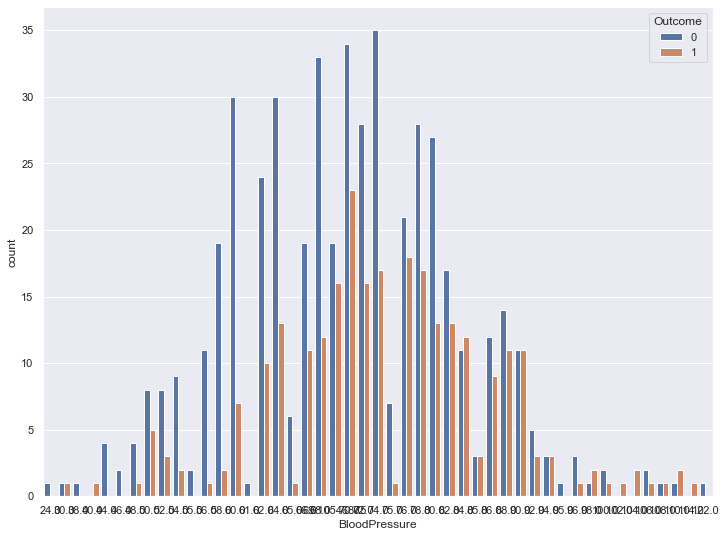

In [21]:
sns.countplot(x = 'BloodPressure', data = new_data, hue = 'Outcome');

<div class="alert alert-success">
    The countplot shows that Diabetes has no correlation with Blood Pressure

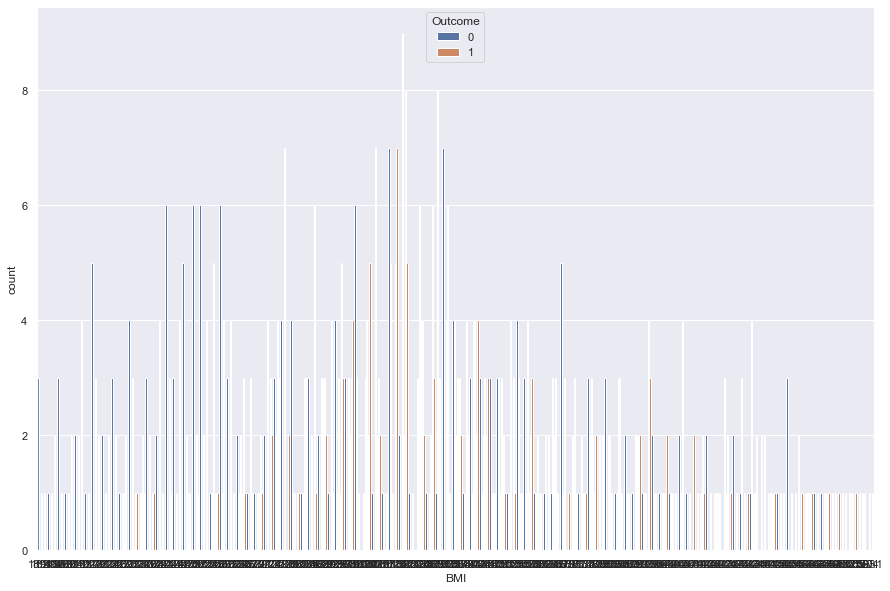

In [22]:
plt.subplots(figsize = (15,10))
sns.countplot(x = 'BMI', data = new_data, hue = 'Outcome');

<div class="alert alert-danger">
    A high BMI value has a possibility of having Diabetes

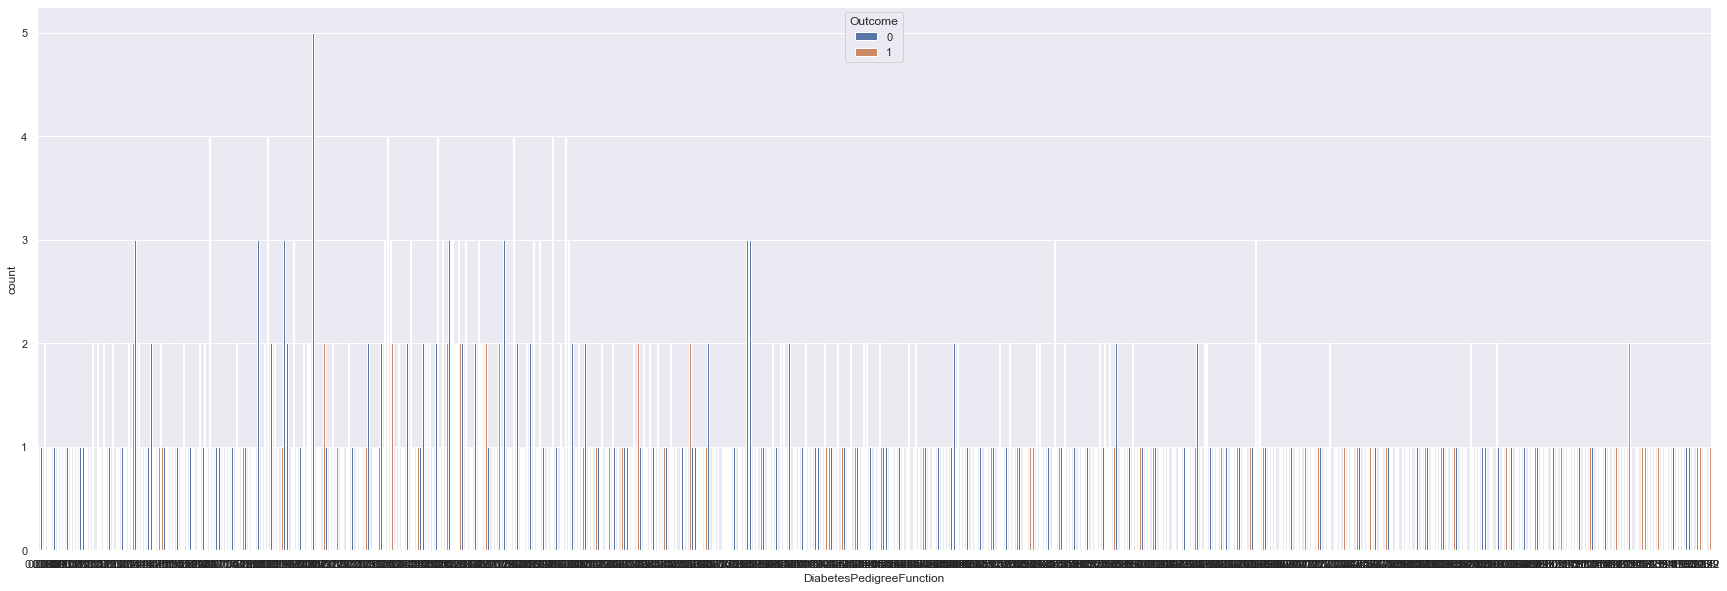

In [23]:
plt.subplots(figsize = (30,10))
sns.countplot(x = 'DiabetesPedigreeFunction', data = new_data, hue = 'Outcome');

<div class="alert alert-success">
    Diabetes Pedigree Function has no correlation with Diabetes

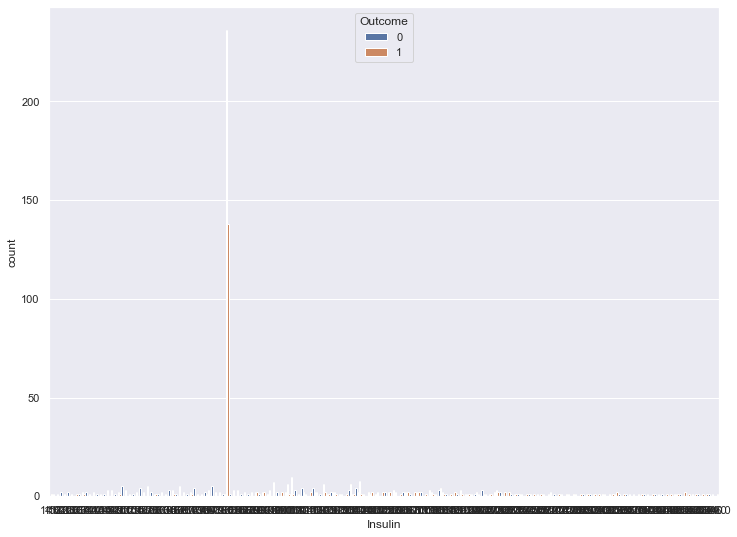

In [24]:
sns.countplot(x = 'Insulin', data = new_data, hue = 'Outcome');

<div class="alert alert-info">
    Insulin has minimum effect on the Outcome

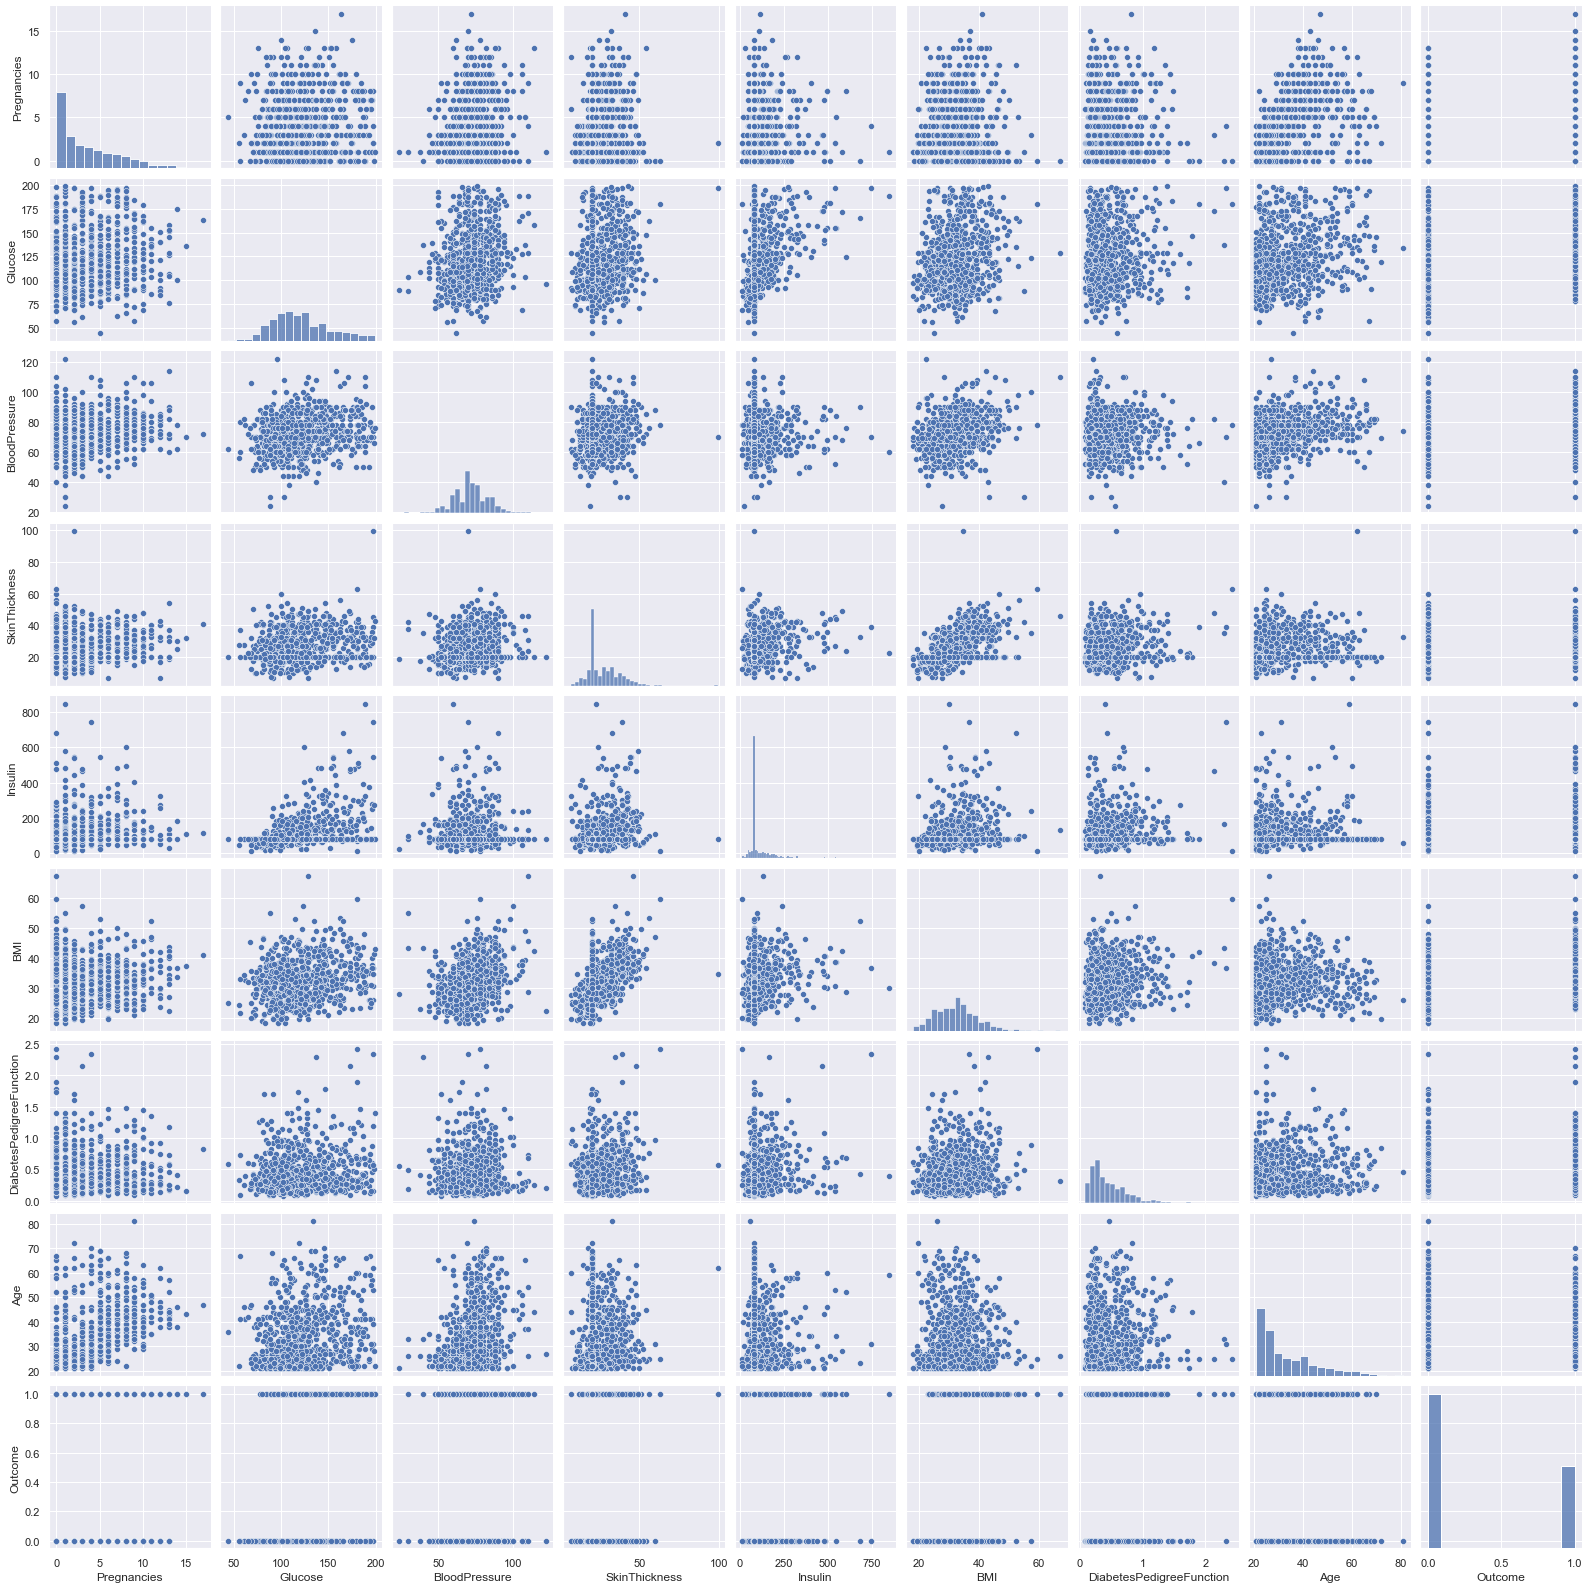

In [25]:
#plotting of a Pairplot to understand the relationship between the variables
sns.pairplot(new_data);

<div class="alert alert-danger">
    
*    From the above Pairplot, we can clearly see that the Variables, 'BMI and Skin Thickness', 'Age and Pregnancies', 'Glucose and Insulin', 'Blood Pressure and BMI' ,and Variables 'Age and Blood Pressure' are **positively correlated**. 
    
*    Variable 'Age' has **no correlation** with the variables, 'Insulin, Skin Thickness, BMI and Diabetes Pedigree Function'. 
    
*    Variable 'Pregnancies' is **negatively correlated** with 'Insulin' and 'Diabetes Pedigree Function'.

## Correlation Analysis:

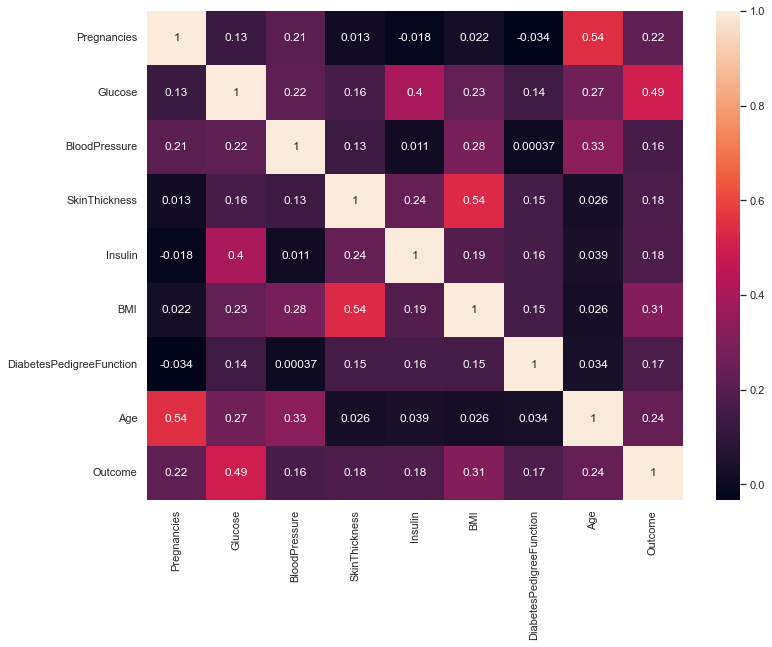

In [26]:
# Heatmap
sns.set(rc = {'figure.figsize':(12,9)})
sns.heatmap(new_data.corr(), annot = True)
plt.show()

<div class="alert alert-danger">
Heatmap shows correlation between the variables. lighter the the colour, more the correlation.

### For training a model, we need to select the features that are correlated. we shall find features that have correlation greater than or equal to 0.5 and select those features and train the model. 

In [27]:
correlation = new_data.corr()
correlation[correlation > 0.4]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.544341,NaN
Glucose,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.492908
BloodPressure,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
SkinThickness,NaN,NaN,NaN,1.000000,NaN,0.535703,NaN,NaN,NaN
Insulin,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
BMI,NaN,NaN,NaN,0.535703,NaN,1.000000,NaN,NaN,NaN
DiabetesPedigreeFunction,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Age,0.544341,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
Outcome,NaN,0.492908,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


<div class="alert alert-info">
The variables, Pregnancies, Age, Skin Thickness, BMI and Glucose have correlation greater than or equal to 0.5.

In [28]:
#Let us create an alias of the selected features
selected_data = new_data[["Pregnancies","Glucose", "BMI", "SkinThickness","Age"]]
print(selected_data)

     Pregnancies  Glucose   BMI  SkinThickness  Age
0              6    148.0  33.6      35.000000   50
1              1     85.0  26.6      29.000000   31
2              8    183.0  23.3      20.536458   32
3              1     89.0  28.1      23.000000   21
4              0    137.0  43.1      35.000000   33
..           ...      ...   ...            ...  ...
763           10    101.0  32.9      48.000000   63
764            2    122.0  36.8      27.000000   27
765            5    121.0  26.2      23.000000   30
766            1    126.0  30.1      20.536458   47
767            1     93.0  30.4      31.000000   23

[768 rows x 5 columns]


In [29]:
#Let us standardise the data using Standard Scaler, where are the variables are converted to the format, Mean=0 and Standard Deviation =1.
#Import standard scaler from sklearn library
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
model = scaler.fit(selected_data)
scaled_data = model.transform(selected_data)
print(scaled_data)

[[ 0.63994726  0.86527574  0.16725546  0.87205698  1.4259954 ]
 [-0.84488505 -1.20598931 -0.85153454  0.2486783  -0.19067191]
 [ 1.23388019  2.01597855 -1.33182125 -0.6306536  -0.10558415]
 ...
 [ 0.3429808  -0.02240928 -0.90975111 -0.37470037 -0.27575966]
 [-0.84488505  0.14197684 -0.34213954 -0.6306536   1.17073215]
 [-0.84488505 -0.94297153 -0.29847711  0.45647119 -0.87137393]]


In [30]:
# let us split the data into training and testing sample 
from sklearn.model_selection import train_test_split

In [31]:
X = scaled_data
y = new_data['Outcome']

In [32]:
print(X.shape)
print(y.shape)

(768, 5)
(768,)


In [33]:
# Split the train test data in the ratio of 80:20
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=1) 

In [34]:
# Import the Logistic Regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [35]:
# Check the accuracy of the model, f1 score and generate the classification report.
accuracy = logreg.score(X_test, y_test)
print('Accuracy of Logistic Regression :  ', accuracy*100)

from sklearn.metrics import f1_score, classification_report, confusion_matrix
y_pred = logreg.predict(X_test)
f1 = f1_score(y_pred, y_test)
print('f1_score : ', f1) 
con_mat = confusion_matrix(y_test, y_pred)
print()
print('Confusion Matrix: \n ', con_mat)
print()
print(classification_report(y_pred, y_test))

Accuracy of Logistic Regression :   76.62337662337663
f1_score :  0.6326530612244898

Confusion Matrix: 
  [[87 12]
 [24 31]]

              precision    recall  f1-score   support

           0       0.88      0.78      0.83       111
           1       0.56      0.72      0.63        43

    accuracy                           0.77       154
   macro avg       0.72      0.75      0.73       154
weighted avg       0.79      0.77      0.77       154



In [36]:
# Let us train a Decision Tree model ad check its accuracy and f1 score
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)

In [37]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix, accuracy_score  
accu = accuracy_score(y_test, y_predict)
print("Accuracy of Decision Tree Classifier", accu*100)

f1score = f1_score(y_predict, y_test)
print('f1 score :', f1score)
con_mat1 = confusion_matrix(y_test, y_predict)
print(confusion_matrix(y_test, y_predict))  
print(classification_report(y_test, y_predict))

Accuracy of Decision Tree Classifier 72.07792207792207
f1 score : 0.6126126126126126
[[77 22]
 [21 34]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



In [38]:
# Let us use a Random Forest Classifier and check the scores
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 30, random_state = 0)
rfc.fit(X_train,y_train)
y_predicted = rfc.predict(X_test)

In [39]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix, accuracy_score
acc = accuracy_score(y_test, y_predicted)
print("Accuracy of Random Forest Classifier: ", acc*100)
F1score = f1_score(y_predicted, y_test)
print("f1 score: ", F1score)
con_mat2 = confusion_matrix(y_test, y_predicted)
print(confusion_matrix(y_test, y_predicted))
print(classification_report(y_test, y_predicted))

Accuracy of Random Forest Classifier:  75.97402597402598
f1 score:  0.6407766990291262
[[84 15]
 [22 33]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        99
           1       0.69      0.60      0.64        55

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154



In [40]:
#Usng a K-NN algorithm, let us find the accuracy and f1 score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred1 = knn.predict(X_test)

In [41]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report, accuracy_score
accu = accuracy_score(y_test, y_pred1)
print("Accuracy of K-NN algorithm: ", accu)
F1 = f1_score(y_pred1, y_test)
print("f1 score: ", F1)
con_mat3 = confusion_matrix(y_test, y_pred1)
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

Accuracy of K-NN algorithm:  0.7402597402597403
f1 score:  0.6296296296296297
[[80 19]
 [21 34]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        99
           1       0.64      0.62      0.63        55

    accuracy                           0.74       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154



In [42]:
pip install tabulate   # To make Tables

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'


In [43]:
from tabulate import tabulate

In [44]:
table = [['    ', 'Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 'KNN algorithm'],['f1-score', '0.63','0.59', '0.64', '0.63'],['Accuracy','76.62%', '70.13%', '75.97%', '74.03%']] 

In [45]:
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒══════════╤═══════════════════════╤════════════════════════════╤════════════════════════════╤═════════════════╕
│          │ Logistic Regression   │ Decision Tree Classifier   │ Random Forest Classifier   │ KNN algorithm   │
╞══════════╪═══════════════════════╪════════════════════════════╪════════════════════════════╪═════════════════╡
│ f1-score │ 0.63                  │ 0.59                       │ 0.64                       │ 0.63            │
├──────────┼───────────────────────┼────────────────────────────┼────────────────────────────┼─────────────────┤
│ Accuracy │ 76.62%                │ 70.13%                     │ 75.97%                     │ 74.03%          │
╘══════════╧═══════════════════════╧════════════════════════════╧════════════════════════════╧═════════════════╛


<div class="alert alert-danger">

**Comparing the Models with that of the KNN algorithm:**
<div class="alert alert-danger">
    From the above table we can infer that, the Logistic Regression model and the KNN have the same f1-score of 0.63. Whereas, the Random Forest classifier is slightly better with an f1-score of 0.64. Decision tree classifier has performed poorly with an f1-score of 0.59.


# AUC (ROC curve):

In [46]:
from sklearn import metrics

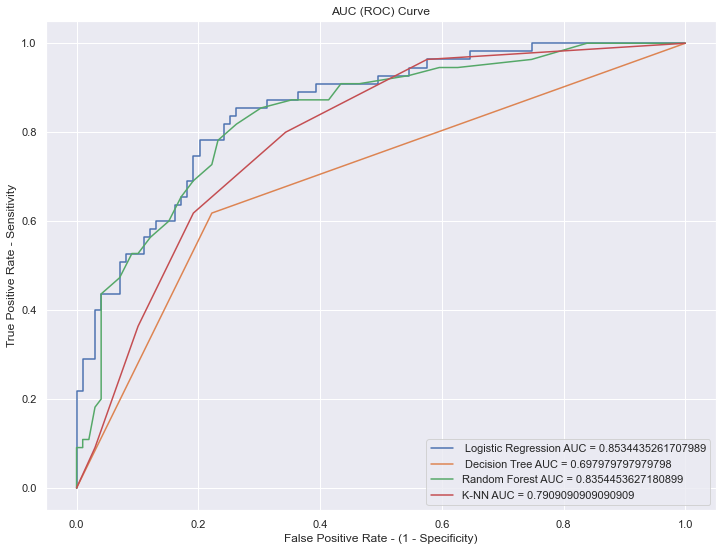

In [47]:
# AUC (ROC Curve) of Logistic Regression
y_pred_proba = logreg.predict_proba(X_test)[:,1]  #predict probabilities of the outcome
fpr,tpr,_ = metrics.roc_curve(y_test, y_pred_proba) # false positive rate(fpr) and true positive rate(tpr)
auc = metrics.roc_auc_score(y_test, y_pred_proba)   # Area under the ROC curve
plt.plot(fpr, tpr, label =" Logistic Regression AUC = "+str(auc))

# AUC (ROC Curve) of Decision Tree Classifier
y_predict_proba = classifier.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_predict_proba)
auc1 = metrics.roc_auc_score(y_test, y_predict_proba)

plt.plot(fpr, tpr, label =" Decision Tree AUC = "+str(auc1))
plt.xlabel('False Positive Rate - (1 - Specificity)')
plt.ylabel('True Positive Rate - Sensitivity')
plt.title('AUC (ROC) Curve')

#AUC (ROC Curve) of Random Forest Classifier
y_predicted_proba = rfc.predict_proba(X_test)[:,1]
fpr,tpr,_ = metrics.roc_curve(y_test, y_predicted_proba)
auc2 = metrics.roc_auc_score(y_test, y_predicted_proba)
plt.plot(fpr, tpr, label =   "Random Forest AUC = "+str(auc2))

#AUC (ROC Curve) of K-NN algorithm
y_pred1_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr,_ = metrics.roc_curve(y_test, y_pred1_proba)
auc3 = metrics.roc_auc_score(y_test, y_pred1_proba)
plt.plot(fpr, tpr, label = "K-NN AUC = "+str(auc3))

plt.legend()
plt.show()

Receiver Operating Characteristic (ROC) Curve gives the relationship between specificity and sensitivity.

In [48]:
# Import required libray for accuracy, specificity, sensitivity
from sklearn.metrics import confusion_matrix, classification_report

In [49]:
# Confusion matrix of Logistic Regression
# TP = confusion_matrix[1,1] # true positive 
# TN = confusion_matrix[0,0] # true negatives
# FP = confusion_matrix[0,1] # false positives
# FN = confusion_matrix[1,0] # false negatives
# Sensitivity = TP/(TP+FN)
# Specificity = TN/(TN+FP)
# Confusion Matrix of Logistic Regression
print('Confusion Matrix of Logistic Regression: ')
print(con_mat)
total1 = sum(sum(con_mat))
Accuracy1 = (con_mat[0,0] + con_mat[1,1])/total1
Sensitivity1 = con_mat[1,1]/(con_mat[1,1] + con_mat[1,0])
Specificity1 = con_mat [0,0]/(con_mat[0,0] + con_mat[0,1]) 
print('Accuracy = ', Accuracy1)
print('Sensitivity = ', Sensitivity1)
print('Specificity = ', Specificity1)

Confusion Matrix of Logistic Regression: 
[[87 12]
 [24 31]]
Accuracy =  0.7662337662337663
Sensitivity =  0.5636363636363636
Specificity =  0.8787878787878788


In [50]:
# Confusion matrix of Decision Tree Classifier
print('Confusion Matrix of Decision Tree Classifier:')
print(con_mat1)
total2 = sum(sum(con_mat1))
Accuracy2 = (con_mat1[0,0] + con_mat1[1,1])/total2
Sensitivity2 = con_mat1[1,1]/(con_mat1[1,1] + con_mat1[1,0])
Specificity2 = con_mat1[0,0]/(con_mat1[0,0] + con_mat1[0,1]) 
print('Accuracy = ', Accuracy2)
print('Sensitivity = ', Sensitivity2)
print('Specificity = ', Specificity2)

Confusion Matrix of Decision Tree Classifier:
[[77 22]
 [21 34]]
Accuracy =  0.7207792207792207
Sensitivity =  0.6181818181818182
Specificity =  0.7777777777777778


In [51]:
#Confusion Matrix of Random Forest Classifier
print('Confusion Matrix of Random Forest Classifier:')
print(con_mat2)
total3 = sum(sum(con_mat2))
Accuracy3 = (con_mat2[0,0] + con_mat2[1,1])/total3
Sensitivity3 = con_mat2[1,1]/(con_mat2[1,1] + con_mat2[1,0])
Specificity3 = con_mat2[0,0]/(con_mat2[0,0] + con_mat2[0,1]) 
print('Accuracy = ', Accuracy3)
print('Sensitivity = ', Sensitivity3)
print('Specificity = ', Specificity3)

Confusion Matrix of Random Forest Classifier:
[[84 15]
 [22 33]]
Accuracy =  0.7597402597402597
Sensitivity =  0.6
Specificity =  0.8484848484848485


In [52]:
# Confusion Matrix of K-NN algorithm
print('Confusion Matrix of K-NN algorithm: ')
print(con_mat3)
total4 = sum(sum(con_mat3))
Accuracy4 = (con_mat3[0,0] + con_mat3[1,1])/total4 
Sensitivity4 = con_mat3[1,1]/(con_mat3[1,1] + con_mat3[1,0])
Specificity4 = con_mat3[0,0]/(con_mat3[0,0] + con_mat3[0,1])
print('Accuracy = ', Accuracy4)
print('Sensitivity = ', Sensitivity4)
print('Specificity = ', Specificity4)

Confusion Matrix of K-NN algorithm: 
[[80 19]
 [21 34]]
Accuracy =  0.7402597402597403
Sensitivity =  0.6181818181818182
Specificity =  0.8080808080808081


In [53]:
table1 = [['         ' , 'Logistic Regression', 'Decision Tree Clssifier', 'Random Forest Classifier', 'K-NN algorithm'],['Parameters', '     ', '      ', '       ', '       '], ['Accuracy', '87.20%', '77.22%', '75.97%', '74.02%'], ['Sensitivity', '0.5636', '0.6182', '0.6', '0.6182'], ['Specificity', '0.8788', '0.7778', '0.8485', '0.8081'], ['AUC', '0.8534', '0.6979', '0.8355', '0.7909']]

In [54]:
print(tabulate(table1, headers = 'firstrow', tablefmt = 'fancy_grid'))

╒═════════════╤═══════════════════════╤═══════════════════════════╤════════════════════════════╤══════════════════╕
│             │ Logistic Regression   │ Decision Tree Clssifier   │ Random Forest Classifier   │ K-NN algorithm   │
╞═════════════╪═══════════════════════╪═══════════════════════════╪════════════════════════════╪══════════════════╡
│ Parameters  │                       │                           │                            │                  │
├─────────────┼───────────────────────┼───────────────────────────┼────────────────────────────┼──────────────────┤
│ Accuracy    │ 87.20%                │ 77.22%                    │ 75.97%                     │ 74.02%           │
├─────────────┼───────────────────────┼───────────────────────────┼────────────────────────────┼──────────────────┤
│ Sensitivity │ 0.5636                │ 0.6182                    │ 0.6                        │ 0.6182           │
├─────────────┼───────────────────────┼───────────────────────────┼─────

Sensitivity is the ability of a model to designate an individual with disease as positive. A highly sensitive model gives fewer false negative results. Specificity is the ability of a model to designate an individual who does not have the disease as negative. 

<div class="alert alert-info"> 
From the above table, we can conclude that the Logistic Regression model performs better than the rest of the classifiers, since the Area Under Curve (AUC) for Logistic Regression model is the highest at 0.8534, 
with Sensitivity at 0.5636, Specificity at 0.8788 and an accuracy of 87.20%, 

In [56]:
#Save the cleaned data in excel format in order to import it to Tableau for Visualization
writer = pd.ExcelWriter('pandas_simple.xlsx', engine='xlsxwriter')
new_data.to_excel(writer, sheet_name = 'raw_data.xls', index = False)

# Data Visualization using Tableau

In [ ]:
<div class='tableauPlaceholder' id='viz1666259069139' style='position: relative'><noscript><a href='#'><img alt='Dashboard:  Healthcare -Diabetes Analysis ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Da&#47;DashboardHealthcare&#47;DashboardHealthcare-DiabetesAnalysis&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='DashboardHealthcare&#47;DashboardHealthcare-DiabetesAnalysis' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Da&#47;DashboardHealthcare&#47;DashboardHealthcare-DiabetesAnalysis&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-GB' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1666259069139');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1409px';vizElement.style.height='2631px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1409px';vizElement.style.height='2631px';} else { vizElement.style.width='100%';vizElement.style.height='4477px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

**Link for the Tableau Dashboard**

https://public.tableau.com/views/DashboardHealthcare/DashboardHealthcare-DiabetesAnalysis?:language=en-GB&publish=yes&:display_count=n&:origin=viz_share_link